RMSE for lambda = 0.1 is 0.03257767029357479.
RMSE for lambda = 1 is 0.17030390344202528.
RMSE for lambda = 10 is 0.6092671596540067.
RMSE for lambda = 100 is 0.9110858052767243.


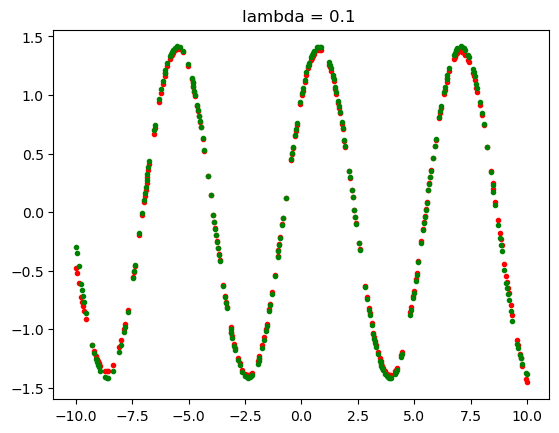

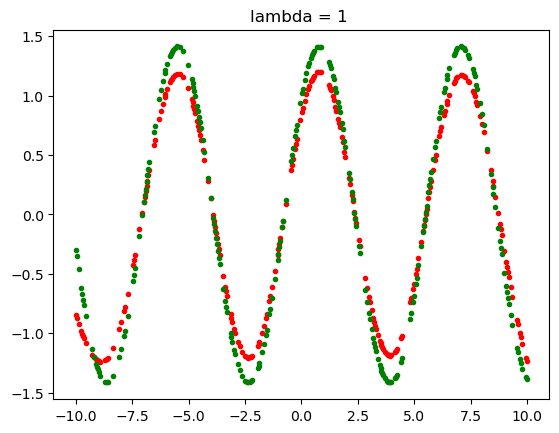

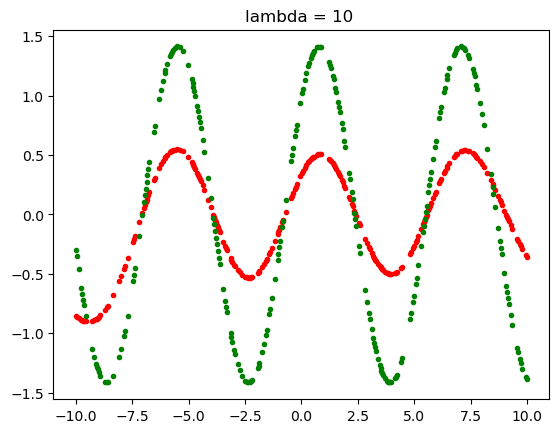

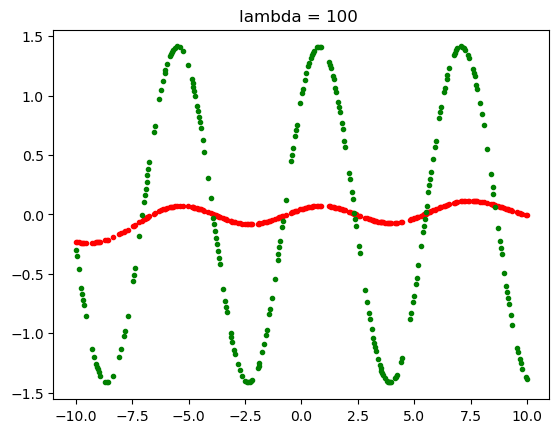

In [14]:
#problem - 5.1.1: Kernel ridge regression
import numpy as np
import matplotlib.pyplot as plt

training_data = np.loadtxt('data/ridgetrain.txt')
test_data = np.loadtxt('data/ridgetest.txt')
train_x = training_data[:,0]
train_y = training_data[:,1]
test_x = test_data[:,0]
test_y = test_data[:,1]

I_mat = np.eye(train_x.shape[0])
bw_param = 0.1
K = np.exp(-bw_param*np.square(train_x.reshape((-1,1)) - train_x.reshape((1,-1)))) #applying RBF Kernel on training data
reg_hp = [0.1, 1, 10, 100]

for _lambda in reg_hp:
    alpha = np.linalg.inv(K + _lambda*I_mat) @ train_y.reshape((-1,1)) #solution as given in mid-sem solution Q6
    K_test = np.exp(-bw_param*np.square(train_x.reshape((-1,1)) - test_x.reshape((1,-1))))
    y_hat = (np.transpose(alpha) @ K_test).reshape((-1,1))

    rmse = np.sqrt(np.mean(np.square(test_y.reshape((-1,1)) - y_hat)))
    print('RMSE for lambda = {} is {}.'.format(_lambda,rmse))

    plt.figure(_lambda)
    plt.title('lambda = {} '.format(_lambda))
    plt.plot(test_x, y_hat, 'r.')
    plt.plot(test_x, test_y, 'g.')

plt.show()


RMSE for L = 2 is 0.9745224740087917.
RMSE for L = 5 is 0.8509405388091287.
RMSE for L = 20 is 0.1273970322614409.
RMSE for L = 50 is 0.07984567976347966.
RMSE for L = 100 is 0.05574534157787297.


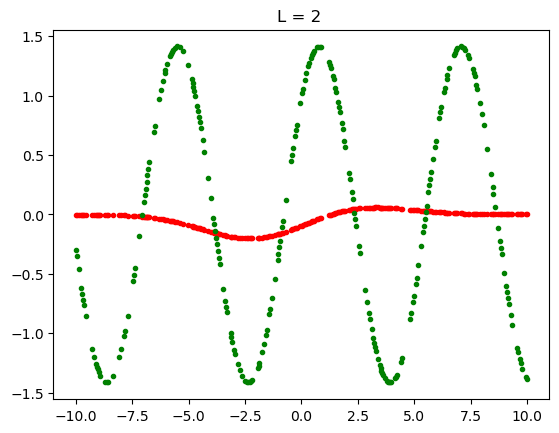

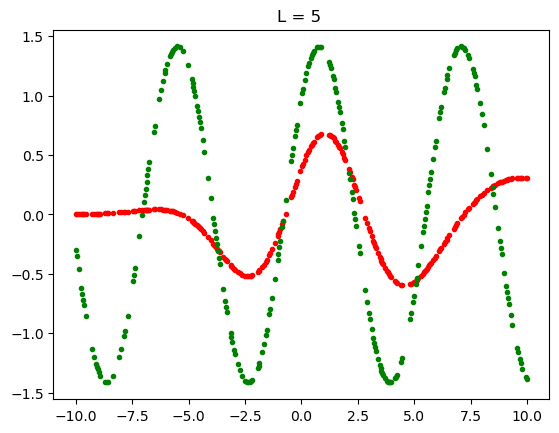

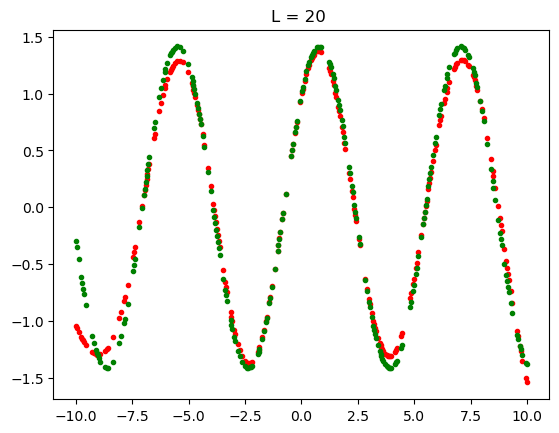

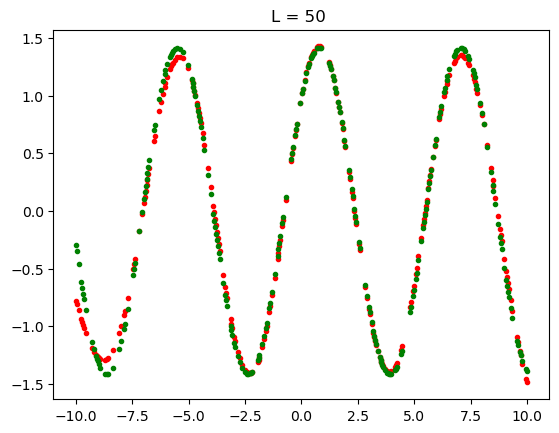

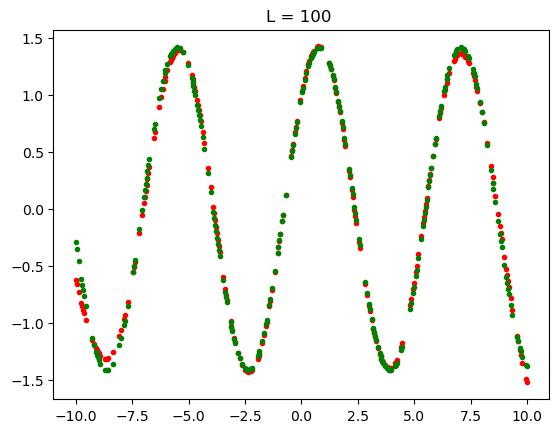

In [16]:
#problem - 5.1.2: landmark Ridge
reg_hparam = 0.1
L_list = [2, 5, 20, 50, 100]

for L in L_list:
    rand_x = np.random.choice(train_x, L, replace=False)
    Id_mat = np.eye(L)
    xf_train = np.exp(-bw_param*np.square(train_x.reshape((-1,1)) - rand_x.reshape((1,-1))))

    W = np.linalg.inv((np.transpose(xf_train) @ xf_train) + reg_hparam*Id_mat) @ (np.transpose(xf_train) @ train_y.reshape((-1,1)))

    xf_test = np.exp(-bw_param*np.square(test_x.reshape((-1,1)) - rand_x.reshape((1,-1))))

    pred_y = xf_test @ W

    rmse = np.sqrt(np.mean(np.square(test_y.reshape((-1,1)) - pred_y)))
    print('RMSE for L = {} is {}.'.format(L,rmse))

    plt.figure(L)
    plt.title('L = {} '.format(L))
    plt.plot(test_x, pred_y, 'r.')
    plt.plot(test_x, test_y, 'g.')

plt.show()
